In [1]:
pwd

'C:\\Users\\admin\\Desktop\\Personal stuff\\osano'

In [8]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [9]:
df = pd.read_csv('Raisin_Dataset.csv')

In [10]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [12]:
#data processing
#unique species
df.Class.unique()

array(['Kecimen', 'Besni'], dtype=object)

In [13]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [15]:
df['Class']

0      Kecimen
1      Kecimen
2      Kecimen
3      Kecimen
4      Kecimen
        ...   
895      Besni
896      Besni
897      Besni
898      Besni
899      Besni
Name: Class, Length: 900, dtype: object

In [19]:
# Converting type of columns to category
categorical_columns = df.select_dtypes(include=[object]).columns
Label_Encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    Label_Encoders[col] = le
    
#print the dataframe after encoding
print("\nDataframe after encoding")

#print the LabelEncoder for each column
print("\nLabelEncoders:")
for col, encoder in Label_Encoders.items():
    print(f"{col}): {encoder.classes_}")


Dataframe after encoding

LabelEncoders:
Class): ['Besni' 'Kecimen']


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int32  
dtypes: float64(5), int32(1), int64(2)
memory usage: 52.9 KB


In [21]:
df[50:]

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
50,44939,317.616712,183.315215,0.816632,46400,0.656178,845.786,1
51,114648,508.128933,288.953981,0.822571,118314,0.681905,1340.897,1
52,65727,403.194272,210.073264,0.853543,67372,0.616981,1030.155,1
53,45683,333.262532,177.772096,0.845844,48787,0.634231,901.102,1
54,111450,478.310971,298.630592,0.781150,113256,0.690093,1298.188,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [23]:
df['Class']
df.Class[50:58]

50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
Name: Class, dtype: int32

<Axes: >

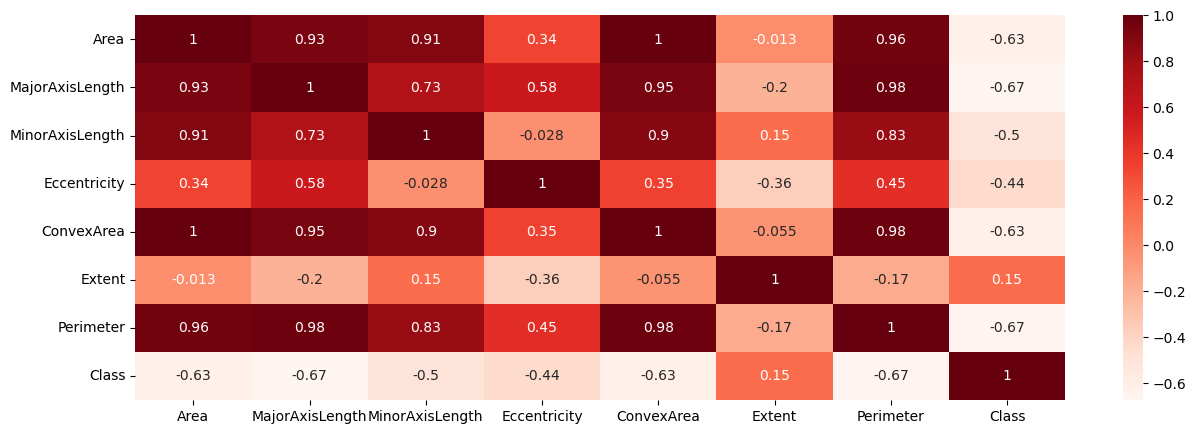

In [24]:
fig = plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="Reds")